# Exploring Willy Wonka

### Introduction

In [2]:
from lib import load_data
import pandas as pd

engine, df = load_data()
df[:1]

,index,order_id,list_lineitem_id,user_id,order_date,order_value,order_item_count,order_single_item,order_channel,order_coupon_code,...,order_store_city,order_store_id,order_day_part,order_is_freeshipping,list_sku,list_sku_category,list_sku_flavor,user_loyalty_program,user_age,user_gender
0,0,TXN-52889719,"ITEM-2008965888,ITEM-2009089674",USER-16961214,2021-05-04,49.325488,2,False,digital_direct,express5,...,Dallas,Dallas-3,evening,1,"SKU-3014,SKU-3002","Energy Shot,Energy Bar","Chocolate Brownie,Peanut Butter",bronze,49,F


<AxesSubplot: >

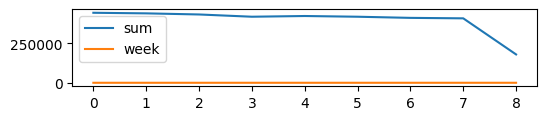

In [3]:
query = 'select sum(order_value), extract(week from order_date) as week from raw_orders group by week'
pd.read_sql(query, engine).plot(figsize=(6, 1))

In [4]:
from lib import print_grouped_bys, group_and_print

In [5]:
user_cols = ['user_age', 'user_gender', 'user_id']
order_cols = ['order_single_item', 'order_date', 'order_id', 'order_item_count']
timing_cols = ['order_day_part', 'order_date']
marketing_cols = ['order_channel', 'order_referrer', 'order_ad_shown', 'order_is_freeshipping', 'order_coupon_code', 'user_loyalty_program']

location_cols = ['order_store_city', 'order_store_id']
product_cols = ['list_sku', 'list_sku_category', 'list_sku_flavor'] 

### Summary

* bell curve with peak at 27 - 30 year olds, with more spending by females

* Top six products skus dominate
* Energy shot, granola bar, protein bar, energy drink, energy bar
* Chocolate
* Most purchase in evening, followed by morning and afternoon (not at night)

user_age


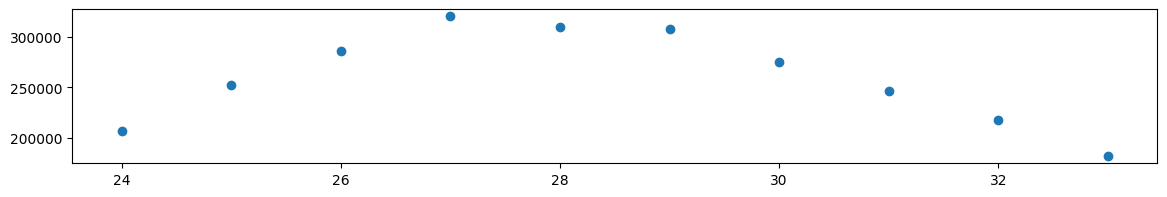

user_gender


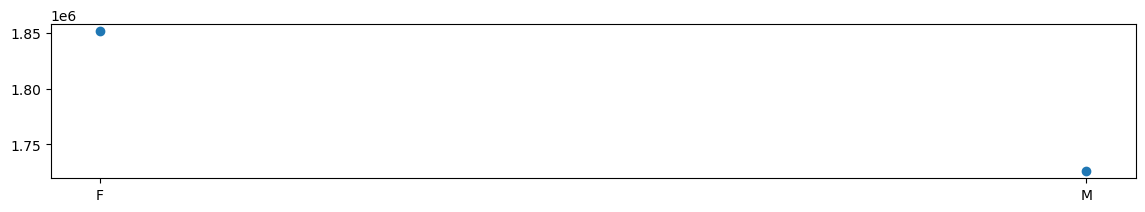

In [11]:
from lib import group_and_print

group_and_print(df, user_cols[:2])


list_sku


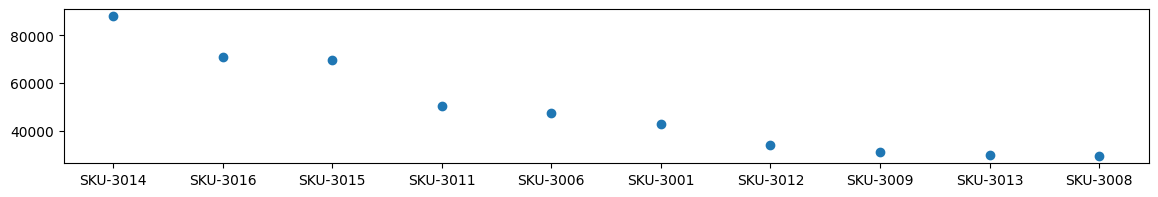

list_sku_category


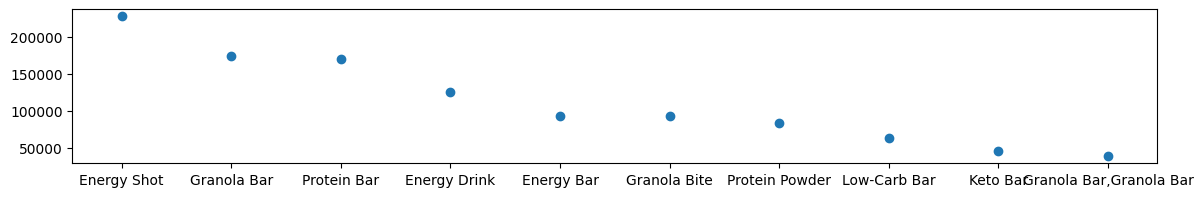

list_sku_flavor


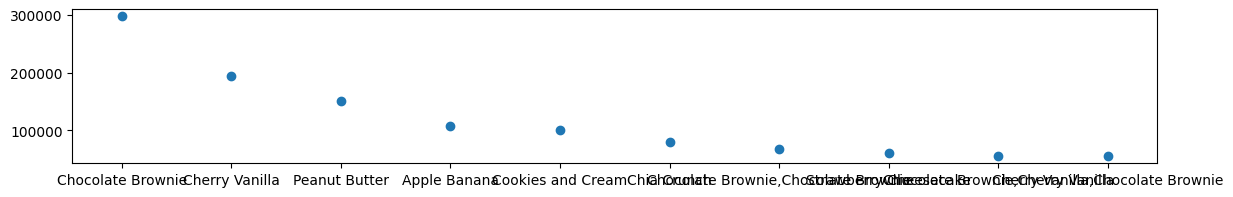

In [8]:
group_and_print(df, product_cols) # top 

order_channel


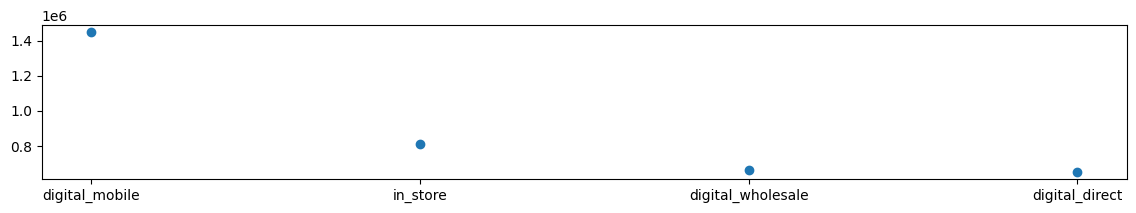

order_referrer


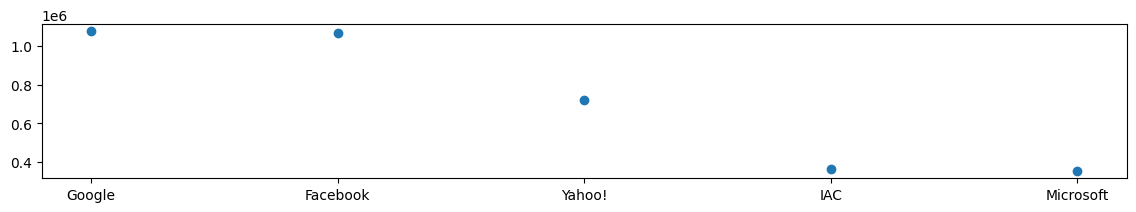

order_ad_shown


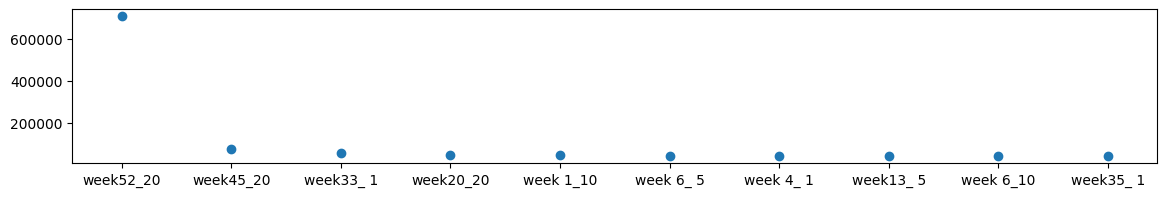

order_is_freeshipping


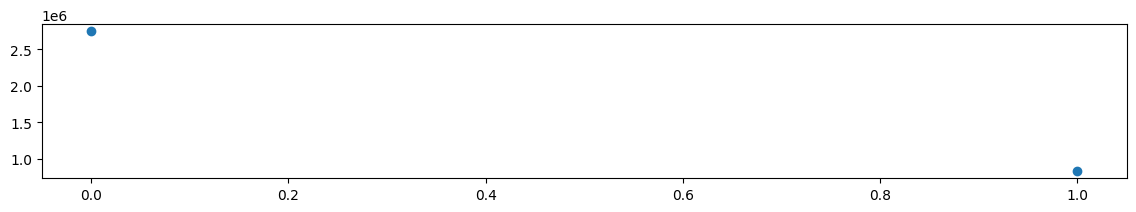

order_coupon_code


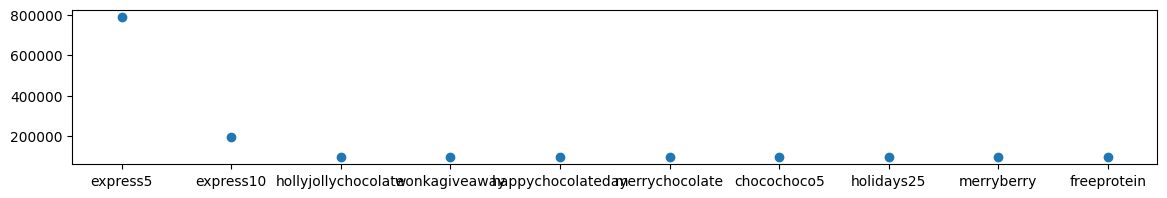

user_loyalty_program


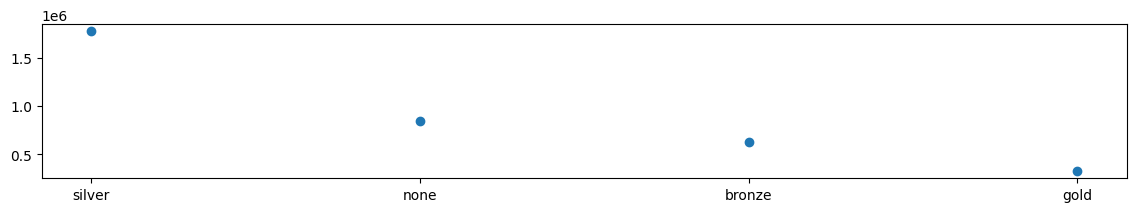

In [9]:
group_and_print(df, marketing_cols)

In [73]:
import numpy as np
table = pd.pivot_table(df, values='order_value',
                    columns=['user_age'], index = ['user_gender'], aggfunc=np.sum, fill_value=0)

In [80]:
f_values = table.loc['F']

In [81]:
m_values = table.loc['M']

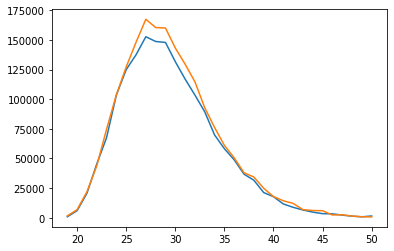

In [82]:
import matplotlib.pyplot as plt
plt.plot(table.columns, m_values)
plt.plot(table.columns, f_values)
plt.show()

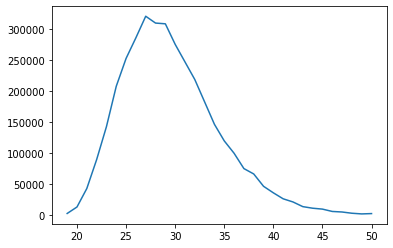

In [67]:
import matplotlib.pyplot as plt
plt.plot(table.columns, table.values[0])

plt.show()

In [ ]:
# order has many line_items

# line_item